# Initializing

### Importing the librairies 

In [49]:
#Import relevant librairies

import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp

#Set some settings for viewing and determine which package versions we are using
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.17.5 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1 leidenalg==0.7.0


### Reading in the data to make an adata object

In [50]:
#Read in the AnnData from a 10X filtered matrix (use gene symbols for the variable names (variables-axis index). This line writes up an h5ad cache file which makes increses the reading speed for subsequent calls. We could also do this from a .h5ad file
adata = sc.read_h5ad('/Users/jm52/data/sc_nextflow/T152_Rectum/adata.h5ad')   

In [51]:
#I prefer to work with Gene Symbols rather than Ensembl IDs
adata.var['ensembl_id'] = adata.var_names
adata.var['gene_symbols'] = adata.var['gene_symbols'].astype(object)
adata.var.set_index('gene_symbols', inplace= True, drop= True)
adata.var_names_make_unique()

#Let's look at the dimensions of our data
adata

AnnData object with n_obs × n_vars = 27699 × 33538
    obs: 'date_of_sample', 'date_of_plate_submission', 'patient_id', 'paper', 'sanger_sample_id', 'sex', 'age', 'biopsy_type', 'disease_status', 'inflammation_status', 'cd_type', 'smoking_status', 'endoscopist', 'collection_time', 'chromium_time', 'experimentalist', 'epithelial_immune_ratio', 'protocol', 'collagenase', 'inhibitor', 'dnase', 'ack_lysis_buffer', 'frozen_processed', 'chip_well_position', 'enzyme_lot', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'id_run', 'lane', 'library_id', 'library_type', 'manual_qc', 'total_reads', 'biopsy_type_original', 'disease_status_original', 'time_to_chromium_processing', 'estimated_number_of_cells', 'mean_reads_per_cell', 'median_genes_per_cell', 'number_of_reads', 'valid_barcodes', 'sequencing_saturation', 'q30_bases_in_barcode', 'q30_bases_in_rna_read', 'q30_bases_in_sample_index', 'q30_bases_in_umi', 'reads_mapped_to_genome', 'reads_mapped_confidently_to_genome', 'reads_mapped_c

In [52]:
#Subsample the data
adata = sc.pp.subsample(adata, n_obs=3000, random_state=0, copy=True)

# Pre-processing

normalizing counts per cell
    finished (0:00:00)


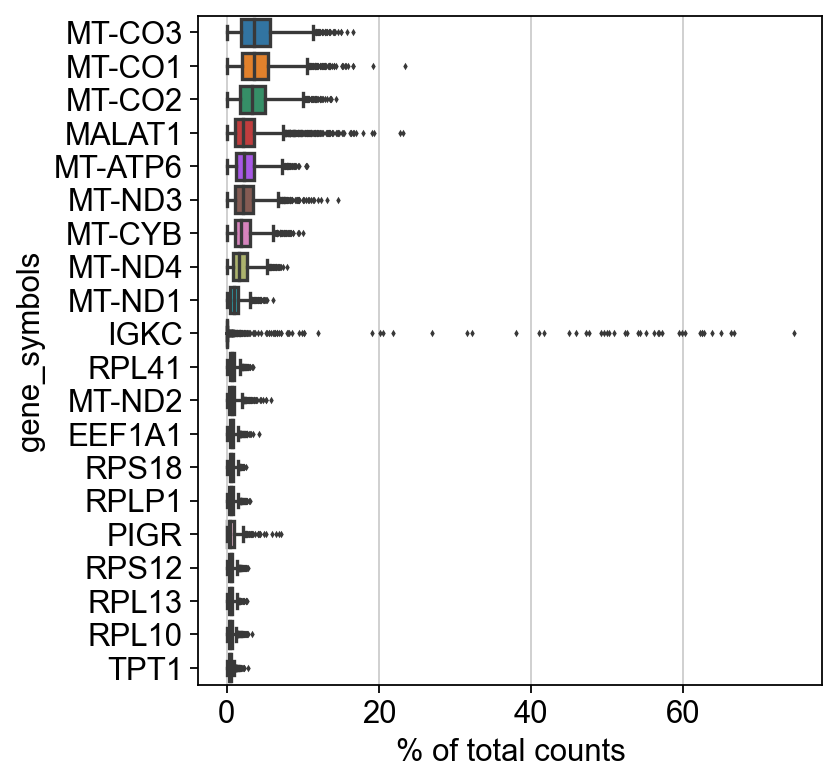

In [53]:
# Show the genes that have the highest fraction count/cell for all cells. This shows many housekeeping genes.
sc.pl.highest_expr_genes(adata, n_top=20)

### Basic Filtering

In [54]:
#Filtering cells with less than 200 genes and genes present in less than 3 cells
sc.pp.filter_cells(adata, min_genes=100)

In [55]:
#Filtering genes present in less than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

filtered out 13678 genes that are detected in less than 3 cells


In [56]:
print(adata)

AnnData object with n_obs × n_vars = 3000 × 19860
    obs: 'date_of_sample', 'date_of_plate_submission', 'patient_id', 'paper', 'sanger_sample_id', 'sex', 'age', 'biopsy_type', 'disease_status', 'inflammation_status', 'cd_type', 'smoking_status', 'endoscopist', 'collection_time', 'chromium_time', 'experimentalist', 'epithelial_immune_ratio', 'protocol', 'collagenase', 'inhibitor', 'dnase', 'ack_lysis_buffer', 'frozen_processed', 'chip_well_position', 'enzyme_lot', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'id_run', 'lane', 'library_id', 'library_type', 'manual_qc', 'total_reads', 'biopsy_type_original', 'disease_status_original', 'time_to_chromium_processing', 'estimated_number_of_cells', 'mean_reads_per_cell', 'median_genes_per_cell', 'number_of_reads', 'valid_barcodes', 'sequencing_saturation', 'q30_bases_in_barcode', 'q30_bases_in_rna_read', 'q30_bases_in_sample_index', 'q30_bases_in_umi', 'reads_mapped_to_genome', 'reads_mapped_confidently_to_genome', 'reads_mapped_co

### Computing the mitochondrial genes 

In [57]:
#Annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-')

#Compute the mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


### QC Plots & Filtering

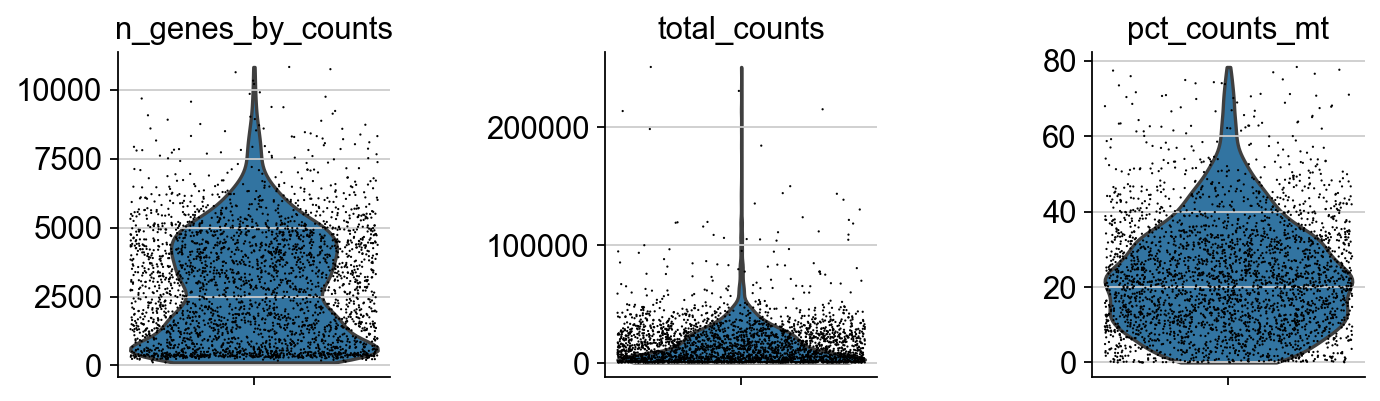

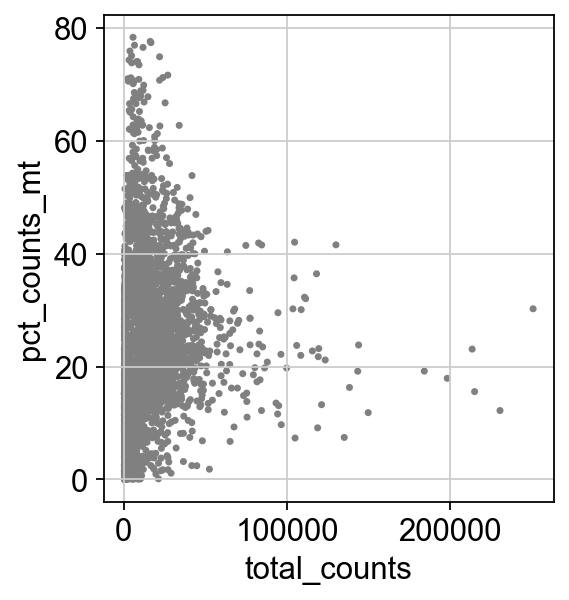

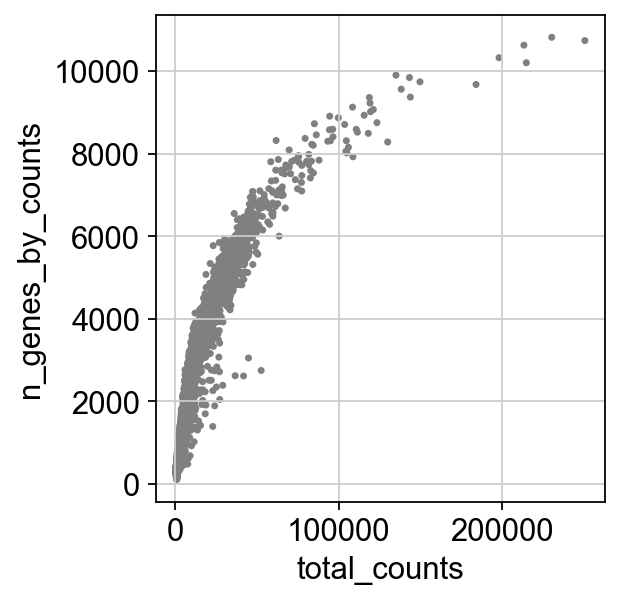

In [58]:
# Plot QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

### Filtering out mitochondrial genes

In [59]:
# Filter out by slicing
adata = adata[adata.obs.pct_counts_mito_gene < 80, :]

adata

View of AnnData object with n_obs × n_vars = 3000 × 19860
    obs: 'date_of_sample', 'date_of_plate_submission', 'patient_id', 'paper', 'sanger_sample_id', 'sex', 'age', 'biopsy_type', 'disease_status', 'inflammation_status', 'cd_type', 'smoking_status', 'endoscopist', 'collection_time', 'chromium_time', 'experimentalist', 'epithelial_immune_ratio', 'protocol', 'collagenase', 'inhibitor', 'dnase', 'ack_lysis_buffer', 'frozen_processed', 'chip_well_position', 'enzyme_lot', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'id_run', 'lane', 'library_id', 'library_type', 'manual_qc', 'total_reads', 'biopsy_type_original', 'disease_status_original', 'time_to_chromium_processing', 'estimated_number_of_cells', 'mean_reads_per_cell', 'median_genes_per_cell', 'number_of_reads', 'valid_barcodes', 'sequencing_saturation', 'q30_bases_in_barcode', 'q30_bases_in_rna_read', 'q30_bases_in_sample_index', 'q30_bases_in_umi', 'reads_mapped_to_genome', 'reads_mapped_confidently_to_genome', 'reads_m

### Normalizing

In [60]:
#Normalizing to 10 000 reads /cell
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/Users/jm52/miniconda3/envs/sc_qc_cluster_j/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [61]:
#Adding the normalized values as a 'norm' layer for X
adata.layers['norm'] = adata.X.copy()

#Saving the data for CPDB preparation (if using Method 1)
adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1//adata_cpdb_norm_notlog.h5ad')

In [63]:
#Log the data
sc.pp.log1p(adata)

### Highly Variable Genes

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


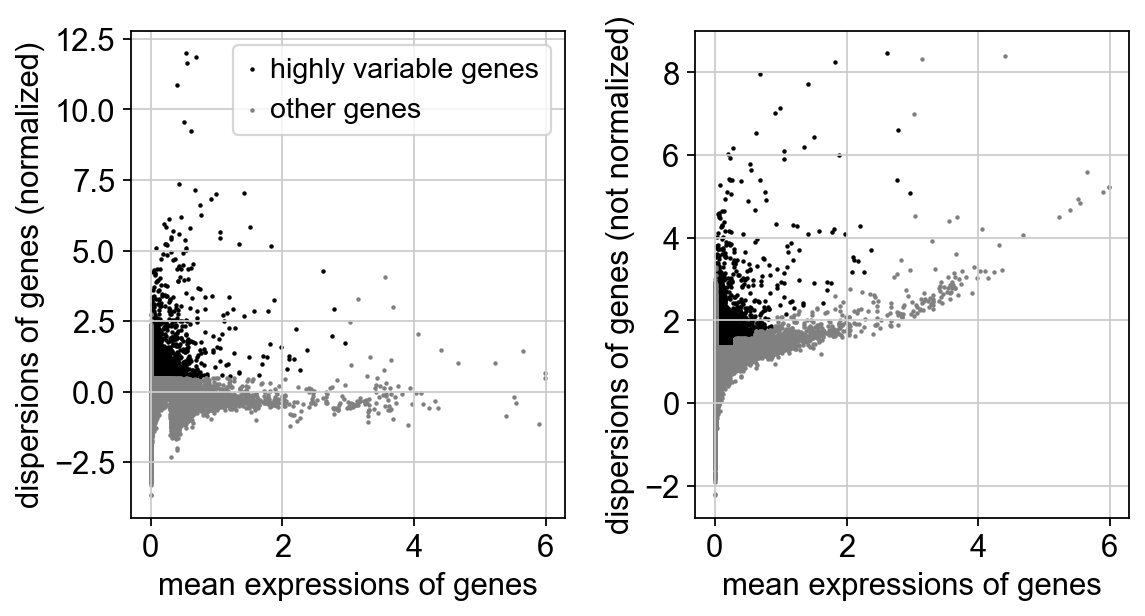

In [64]:
# Highly Variable Genes. The result is stored as an annotation in .var.highly_variable and auto-detected by PCA, neighbours.
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

# Set the default .raw attribute of AnnData object to the normalized and logarithmized raw gene expression for later use
adata.raw = adata

# Filter to only keep the highly variable genes (unessecary step because PCA and etc recognize the .var.highly.variable annotation and do the filtering themselves)
# adata = adata[:, adata.var.highly_variable] --- if this is unecessary, I think this is the step affecting my CPDB norm layer

### Regress Out Features of non-interest

In [65]:
# Regress out total counts and mitochondrial features
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:06)


### Scale Data 

In [66]:
# Scale the data and put a max value of standard deviation to 10

sc.pp.scale(adata, max_value=10)

# Principal Component Analysis (PCA)

In [67]:
#Run PCA to find the most variables axes of the data and remove noise
sc.tl.pca(adata, svd_solver='arpack')



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


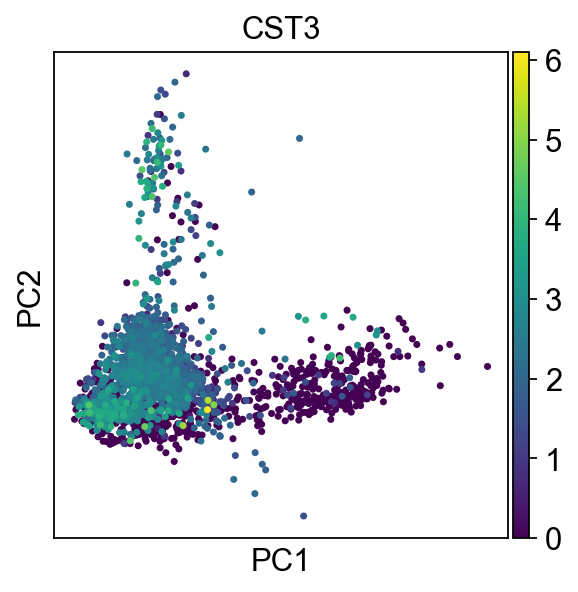

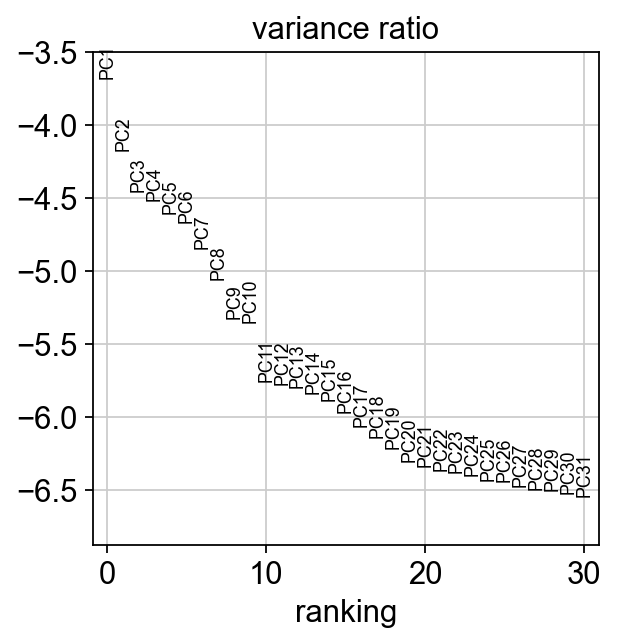

In [68]:
#Scatter plot
sc.pl.pca(adata, color = ['CST3'], gene_symbols= 'gene_symbols')

#Make an elbow plot to determine how many PCs to use for clustering or tSNE
sc.pl.pca_variance_ratio(adata, log=True)

# Save Object

In [69]:
#adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_preproc.h5ad', compression=gzip)

# Neighborhood Graph

### Computing the Neighborhood graph and UMAP

In [70]:
#Computing the neighbors grpah by setting the number of PCs (why 40?)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

#Embed data in UMAP (more faithful to the global connectivity than tSNE apparently)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


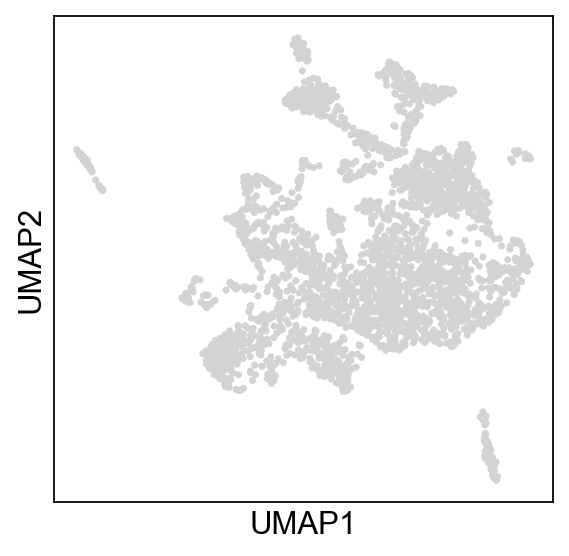

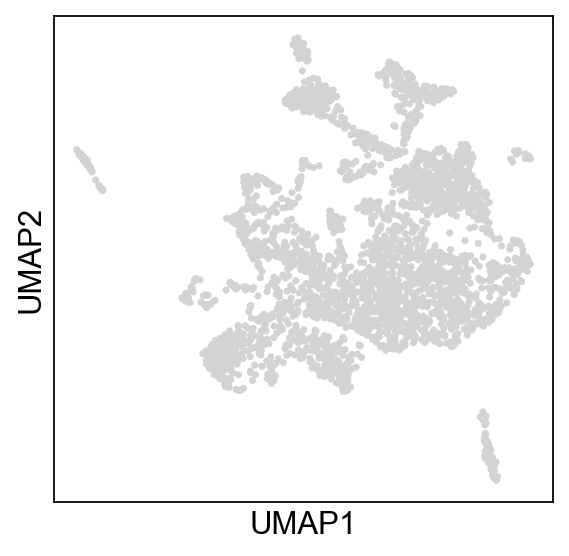

In [71]:
#Plot UMAP using the normalized/log data
sc.pl.umap(adata)

#Plot UMAP using the normalized/log data/scaled/corrected for gene expression
sc.pl.umap(adata, use_raw = False)

### Clustering the neighborhood graph

In [72]:
# Leiden graph-clustering method (community detection based on optimizing modularity). It uses the neighbors we previously calculated
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


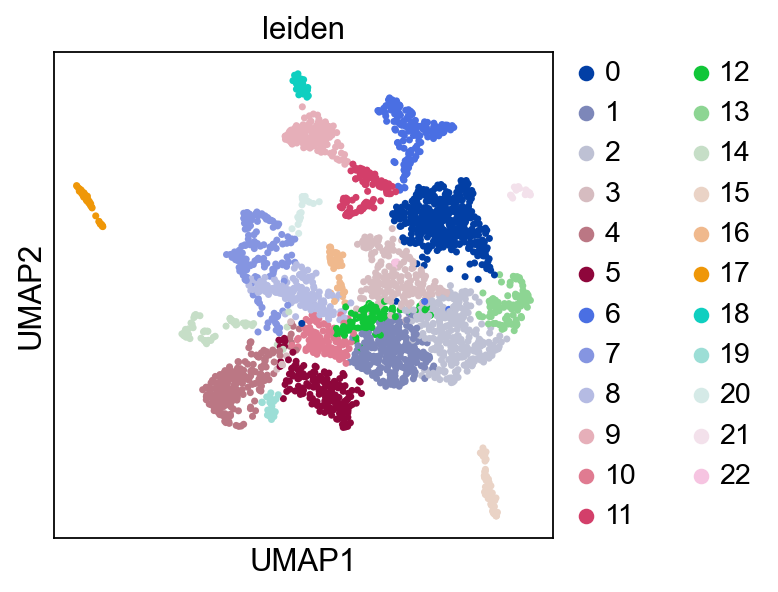

In [73]:
# Plot the clusters
sc.pl.umap(adata, color=['leiden'])

# Save Object

In [74]:
#adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_clustered.h5ad')

# Finding Marker Genes

### Finding marker genes using various methods (there are more powerful ways to do this, like DE)

In [75]:
#Using the raw data and t-test.
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


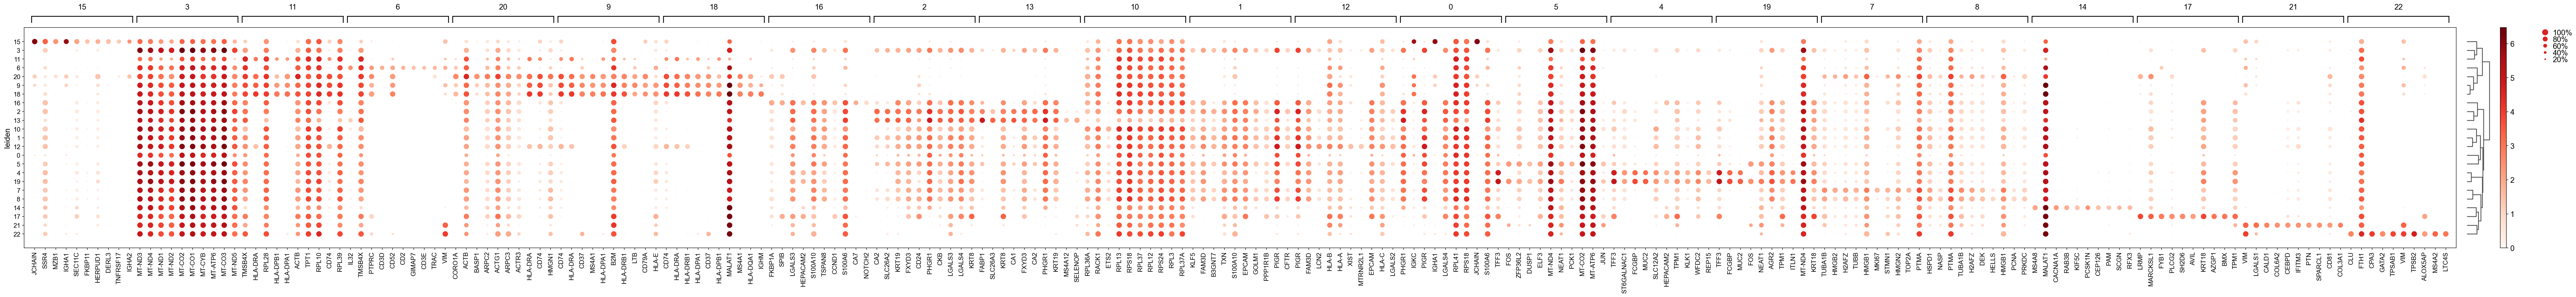

In [76]:
#Plotting the ranked genes
sc.pl.rank_genes_groups_dotplot(adata)

In [31]:
#Saving the Data
#adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_MG_ttest.h5ad')

ranking genes
    finished (0:00:07)


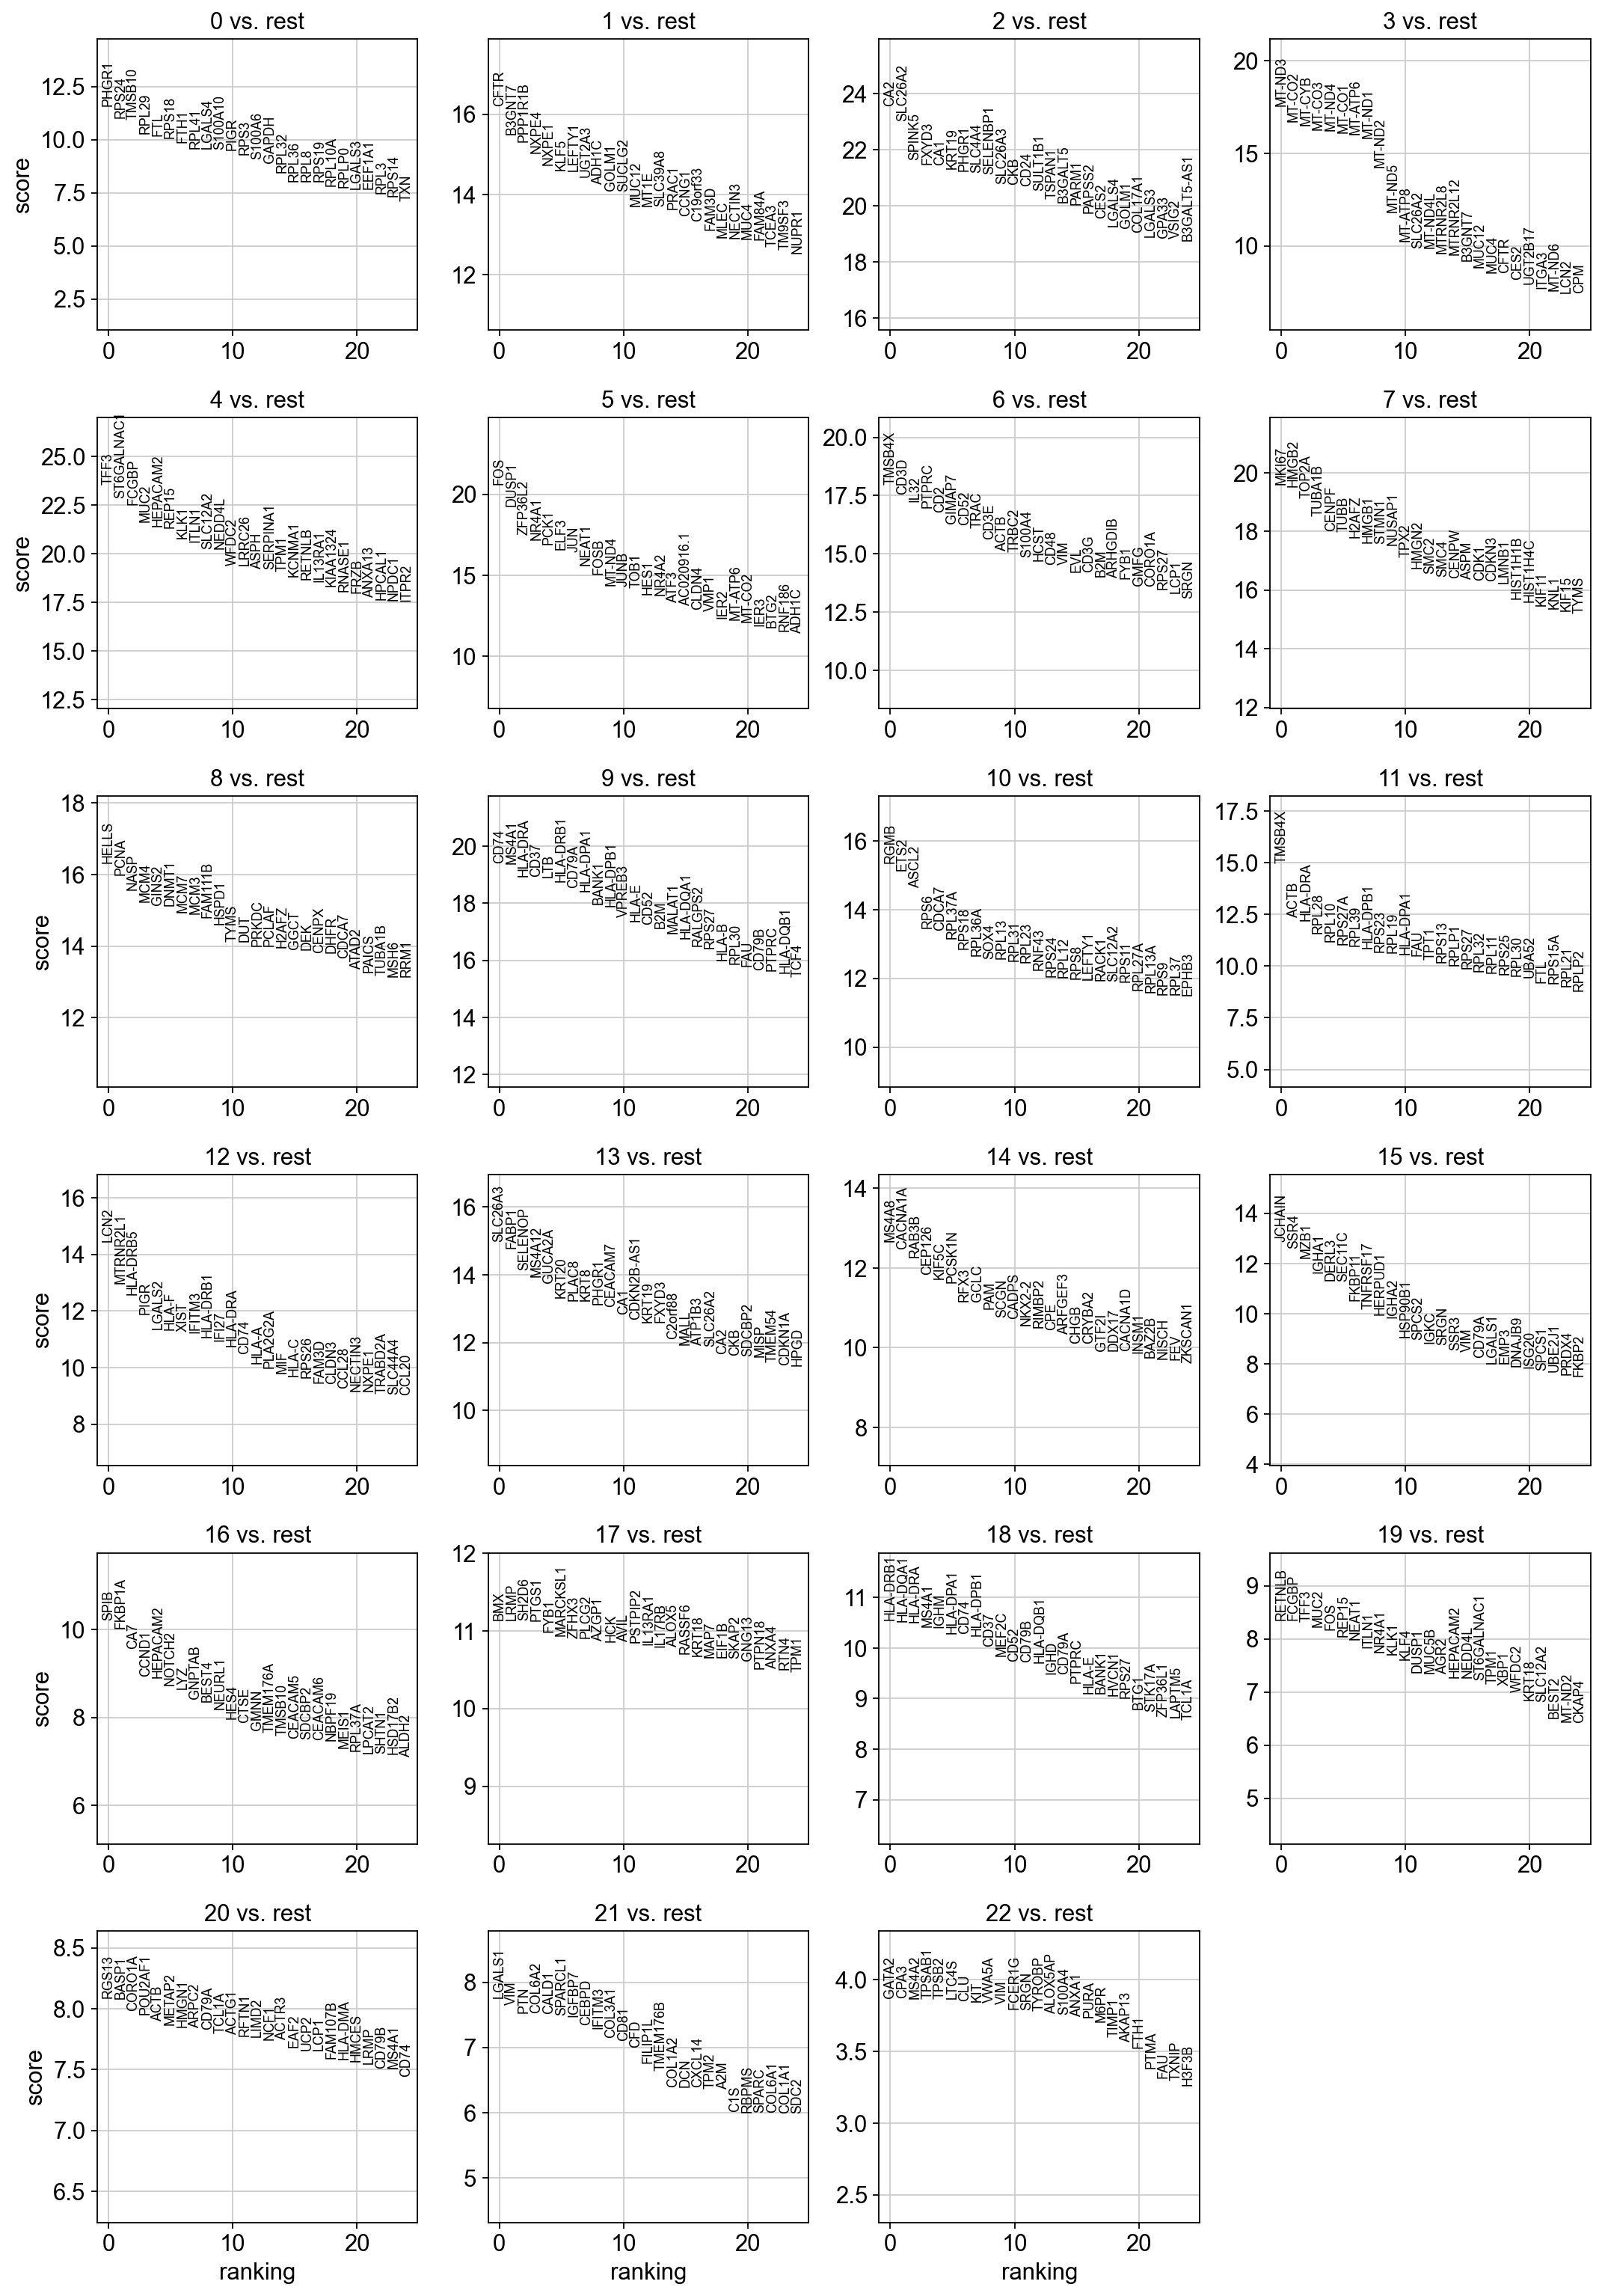

In [77]:
#Using the raw data and wilcoxon.
sc.settings.verbosity = 2
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

#adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_MG_wilcoxon.h5ad')

In [ ]:
#Using the raw data and a logistic regression (uses a multi-variate component rather than univariate).
#sc.settings.verbosity = 2
#sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
#sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

#adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_MG_logreg.h5ad')



### Marker Gene retrival

In [33]:
# Reload the file with the wilcoxon test
#adata = sc.read_h5ad('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_MG_wilcoxon.h5ad')

In [34]:
# Show the top 10 ranked genes per cluster (uns for unprocessed)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0        1        2       3           4        5       6       7  \
0   PHGR1     CFTR      CA2  MT-ND3        TFF3      FOS  TMSB4X   MKI67   
1   RPS24   B3GNT7  SLC26A2  MT-CO2  ST6GALNAC1    DUSP1    CD3D   HMGB2   
2  TMSB10  PPP1R1B   SPINK5  MT-CYB       FCGBP  ZFP36L2    IL32   TOP2A   
3   RPL29    NXPE4    FXYD3  MT-CO3        MUC2    NR4A1   PTPRC  TUBA1B   
4     FTL    NXPE1      CA1  MT-ND4    HEPACAM2     PCK1     CD2   CENPF   

       8        9   ...         13       14      15        16     17  \
0  HELLS     CD74   ...    SLC26A3    MS4A8  JCHAIN      SPIB    BMX   
1   PCNA    MS4A1   ...      FABP1  CACNA1A    SSR4    FKBP1A   LRMP   
2   NASP  HLA-DRA   ...    SELENOP    RAB3B    MZB1       CA7  SH2D6   
3   MCM4     CD37   ...     MS4A12   CEP126   IGHA1     CCND1  PTGS1   
4  GINS2      LTB   ...     GUCA2A    KIF5C   DERL3  HEPACAM2   FYB1   

         18      19       20      21      22  
0  HLA-DRB1  RETNLB    RGS13  LGALS1   GATA2  
1  HLA-DQA1   FCGBP    BASP1     VIM    CPA3  
2   HLA-DRA    TFF3   CORO1A     PTN   MS4A2  
3     MS4A1    MUC2  POU2AF1  COL6A2  TPSAB1  
4      IGHM     FOS     ACTB   CALD1   TPSB2  

[5 rows x 23 columns]

In [35]:
# Defining marker genes
#marker_genes = []

In [36]:
# Get a table that shows the rank_genes_groups with the scores
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n           0_p      1_n           1_p      2_n            2_p  \
0   PHGR1  5.536718e-31     CFTR  4.872531e-59      CA2  9.652223e-123   
1   RPS24  3.879565e-28   B3GNT7  3.718032e-54  SLC26A2  1.712856e-117   
2  TMSB10  7.146555e-28  PPP1R1B  6.598653e-53   SPINK5  8.497758e-104   
3   RPL29  1.067666e-24    NXPE4  5.097270e-51    FXYD3  1.823198e-102   
4     FTL  2.325188e-24    NXPE1  4.116304e-49      CA1  3.710507e-102   

      3_n           3_p         4_n            4_p    ...         18_n  \
0  MT-ND3  6.191057e-69        TFF3  1.097483e-122    ...     HLA-DRB1   
1  MT-CO2  9.435672e-63  ST6GALNAC1  1.437773e-115    ...     HLA-DQA1   
2  MT-CYB  3.803244e-61       FCGBP  3.831801e-112    ...      HLA-DRA   
3  MT-CO3  1.869550e-59        MUC2  6.667316e-104    ...        MS4A1   
4  MT-ND4  5.098871e-59    HEPACAM2  1.296378e-101    ...         IGHM   

           18_p    19_n          19_p     20_n          20_p    21_n  \
0  4.825628e-26  RETNLB  6.477611e-17    RGS13  6.211890e-16  LGALS1   
1  7.021872e-26   FCGBP  7.227901e-17    BASP1  6.514547e-16     VIM   
2  7.978158e-26    TFF3  8.452803e-17   CORO1A  1.393783e-15     PTN   
3  2.078139e-25    MUC2  1.913068e-16  POU2AF1  1.850602e-15  COL6A2   
4  2.650097e-25     FOS  3.353209e-16     ACTB  2.789538e-15   CALD1   

           21_p    22_n      22_p  
0  9.055362e-15   GATA2  0.000109  
1  1.940241e-14    CPA3  0.000109  
2  5.024627e-14   MS4A2  0.000109  
3  5.108008e-14  TPSAB1  0.000109  
4  5.497714e-14   TPSB2  0.000109  

[5 rows x 46 columns]

In [37]:
#Visualize gene expression per cluster
sc.pl.violin(adata, ['CST3', 'NKG7'], groupby='leiden')
sc.pl.dotplot(adata, 'CST3', groupby='leiden')
sc.pl.stacked_violin(adata, groupby='leiden', rotation=90);


KeyError: "Could not find keys '['PPBP']' in columns of `adata.obs` or in `adata.raw.var_names`."

In [ ]:
#Rename clusters
#new_cluster_names = ['CD4 T', 'CD14 Monocytes','B', 'CD8 T','NK', 'FCGR3A Monocytes','Dendritic', 'Megakaryocytes']
#adata.rename_categories('leiden', new_cluster_names)

#Plot UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False)


In [ ]:
#Saving the data using gzip 
adata.write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/adata_fullanalysis_zip.h5ad', compression='gzip') 

#Remove the dense and corrected matrices -- useful for sharing
adata.raw.to_adata().write('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/adata_fullanalysis_withoutX.h5ad')


### Other Bits

In [43]:
print(adata.obs['n_genes_by_counts'].median())
print(adata.obs['pct_counts_mito_gene'].median())
print(adata.obs['total_counts'].median())

2731.5
21.535683
10912.0


### CellPhoneDB Preperation

### Method 1 - As per Tutorial

#### Prepare Initial File (norm data, leiden identity)

In [78]:
#Reading the file that contains the normalized non-logged data previously saved
adatacpdb = sc.read('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/adata_cpdb_norm_notlog.h5ad')

#Adding the leiden cluster ID as an additional observation annotation
adatacpdb.obs['cell_type'] = adata.obs.leiden

#Savefile
#adatacpdb.write('./adata_cpdb_norm_notlog.h5ad')

#### Prepare cpdb_counts

In [79]:
#Transpose the adata object to have the cells as columns and genes as rows
df_exp_matrix = adatacpdb.T

#Convert the adata object to an arrayed dataframe
df_exp_matrix = pd.DataFrame(df_exp_matrix.X.toarray())

In [80]:
#Set columns IDs to cell name
df_exp_matrix.columns = adatacpdb.obs_names

In [81]:
#Set the row IDs (index) to gene names
df_exp_matrix.set_index(adatacpdb.var.index, inplace = True)

In [83]:
#Saving the file
df_exp_matrix.to_csv('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/cpdb_counts.txt',sep='\t')

In [ ]:
#df_exp_matrix.head()

#### Prepare meta_counts

In [84]:
#Extract Cell ID and Leiden info from adatacpdb object into a Panda DF
df_meta = pd.DataFrame(data={'Cell':adatacpdb.obs_names, 'cell_type':list(adatacpdb.obs['cell_type'])})

#Reset the index so that it is the Cell ID
df_meta.set_index('Cell', inplace = True)

In [ ]:
df_meta.to_csv('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/cpdb_meta.txt', sep='\t')

### Method 2 - Using Layers

#### Prepare cpdb_counts2

In [48]:
#Extract Numpy Array containing the Norm values
adatacpdb2 = adata.layers['norm'].copy()

#adatacpdb2 = sp.sparse.csr_matrix.toarray(adatacpdb2)

#Transpose the Numpy array to have the Genes as Rows and cells as Columns
adatacpdb2 = adatacpdb2.T

#Convert the Array to a panda dataframe, while adding the columns and row names
adatacpdb2df = pd.DataFrame(data=adatacpdb2.toarray(), index=adata.var_names, columns=adata.obs_names)

adatacpdb2df.to_csv('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/cpdb_counts.txt',sep='\t')

#### Prepare cpdb_meta2

In [39]:
#Get the Cell ID and cell_type through leiden
df_meta2 = pd.DataFrame(data={'Cell':adata.obs_names, 'cell_type':list(adata.obs['leiden'])})

#Set the index to Cell
df_meta2.set_index('Cell', inplace = True)

df_meta2.to_csv('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/SubSample1/cpdb_meta.txt',sep='\t')


### Sanity Check

In [40]:
#Equivalence of the count matrices
#print(adatacpdb2df.equals(df_exp_matrix))

#Equivalence of the meta matrices
#print(df_meta2.equals(df_meta))